<h1><center> Loading Data </h1>

In [1]:
import pandas as pd

df = pd.read_csv('ClassificationProblem1.txt', delimiter='\t')
print(df.shape)
display(df.head())

(101180, 24)


,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


<h1><center> Data Preprocessing </h1>

In [2]:
## Handling Datatypes
from lib import datasetPrimAnalysis

## Feature 'F15' & 'F16' are datetime
df['F15'] = pd.to_datetime(df['F15'],format='%m/%d/%Y')
df['F16'] = pd.to_datetime(df['F16'],format='%m/%d/%Y')

## Feature 'F1' & 'F1' are datetime
# F5, F6, F7, F8, F9 each has approx 19.8k unique values
df['F5'] = df['F5'].astype(str)
df['F6'] = df['F6'].astype(str)
df['F7'] = df['F7'].astype(str)
df['F8'] = df['F8'].astype(str)
df['F9'] = df['F9'].astype(str)

# F7 & F18 each has 5 unique values
df['F17'] = df['F17'].astype(str)
df['F18'] = df['F18'].astype(str)

# F19 & F20 each has 5 unique values
df['F19'] = df['F19'].astype(str)
df['F20'] = df['F20'].astype(str)
df['F21'] = df['F21'].astype(str)
df['F22'] = df['F22'].astype(str)

df['C'] = df['C'].astype(str)


## Feature Engineering
## Checking this new Feature (Difference o these two dates)
# df['Diff_F16_15_days'] = [ (df['F16'][i] - df['F15'][i]).days for i in range(len(df)) ]

# df['F15_d'] = [ ele.timestamp() / (60*60*24) for ele  in df['F15'] ] ## days since refeerence time 1Jan1970
# df['F16_d'] = [ ele.timestamp() / (60*60*24) for ele  in df['F16'] ] 
# df['Diff_F16_15_days'] = [ df['F16'][i] - df['F15'][i] for i in range(len(df)) ]


df_info = datasetPrimAnalysis(df)

Overall dataset shape : (101180, 24)
____________| Number of feature/s which are Time based : 2 |____________


,IsNullSum,dtypes,IsNaSum,count,unique,top,freq,first,last,%Missing
F15,0,datetime64[ns],0,101180,8031,1985-03-13,46,1970-06-01,2005-01-23,0.0
F16,0,datetime64[ns],0,101180,6300,1991-01-13,55,1977-11-15,2005-03-04,0.0


____________| Number of feature/s which are Qualitative : 12 |____________


,IsNullSum,dtypes,IsNaSum,count,unique,top,freq,CategoriesName,%Missing
F5,0,object,0,101180,19876,2981,17,"[7934, -8238, 8540, -7772, 1571, -6554, -9455,...",0.0
F6,0,object,0,101180,19862,7773,17,"[-6970, 1219, 5266, -383, -8039, 8770, -9937, ...",0.0
F7,0,object,0,101180,19865,-4464,18,"[-5714, 1663, -9377, 9681, -7961, 1065, 4079, ...",0.0
F8,0,object,0,101180,19866,3415,16,"[9982, 1287, -3504, -8661, -2385, -9720, 8178,...",0.0
F9,0,object,0,101180,19887,6073,15,"[-5697, -3658, -4511, 3474, 4407, 5801, -663, ...",0.0
F17,0,object,0,101180,5,1,81320,"[2, 1, 4, 6, 3]",0.0
F18,0,object,0,101180,5,1,81432,"[1, 2, 4, 6, 3]",0.0
F19,0,object,0,101180,646,901,2139,"[706, 423, 703, 122, 486, 806, 448, 187, 701, ...",0.0
F20,0,object,0,101180,646,901,2029,"[305, 206, 315, 304, 240, 157, 702, 123, 34, 7...",0.0
F21,0,object,0,101180,21,1,41565,"[1, 18, 15, 6, 5, 3, 8, 9, 4, 21, 2, 11, 10, 1...",0.0


____________| Number of feature/s which are Quantitative : 10 |____________


,IsNullSum,dtypes,IsNaSum,count,mean,std,min,25%,50%,75%,max,%Missing
Index,0,int64,0,101180.0,5.059050e+04,2.920829e+04,1.000000e+00,2.529575e+04,5.059050e+04,7.588525e+04,1.011800e+05,0.0
F1,0,float64,0,101180.0,5.023477e-01,2.880579e-01,1.844080e-05,2.538188e-01,5.018017e-01,7.535983e-01,9.999856e-01,0.0
F2,0,float64,0,101180.0,5.014966e-01,2.890167e-01,3.709570e-06,2.511152e-01,5.010954e-01,7.524044e-01,9.999898e-01,0.0
F3,0,float64,0,101180.0,4.998863e-01,2.888748e-01,1.758830e-06,2.488185e-01,4.998198e-01,7.502808e-01,9.999853e-01,0.0
F4,0,float64,0,101180.0,4.998388e-01,2.887291e-01,5.640770e-06,2.505012e-01,5.013866e-01,7.488031e-01,9.999773e-01,0.0
F10,0,int64,0,101180.0,1.869749e+07,5.769064e+09,-9.999816e+09,-4.966961e+09,4.346691e+07,5.019440e+09,9.999497e+09,0.0
F11,0,int64,0,101180.0,-7.052456e+06,5.779111e+09,-9.999804e+09,-4.994511e+09,-5.477172e+07,4.994296e+09,9.999897e+09,0.0
F12,0,int64,0,101180.0,6.921685e+06,5.771750e+09,-9.999754e+09,-4.991278e+09,4.277384e+07,5.008238e+09,9.999555e+09,0.0
F13,0,int64,0,101180.0,1.127538e+07,5.786659e+09,-9.999852e+09,-5.027003e+09,9.416236e+06,5.032947e+09,9.999951e+09,0.0
F14,0,int64,0,101180.0,-5.198163e+07,5.782358e+09,-9.999767e+09,-5.070403e+09,-8.816174e+07,4.947133e+09,9.999997e+09,0.0


In [3]:
## Handling Missing Obsservation
''' Nothing to do here '''

## Analyzing Outliers
def outlier_zScore_series(ser, threshold = 3):
    ser_mean, ser_std = ser.mean(), ser.std()
    ser = list(ser)
    if ser_std != 0:
        #return [ True if abs((ele - ser_mean)/ser_std) > threshold else False for ele in ser ] 
        return [ i for i in range(len(ser)) if abs((ser[i] - ser_mean)/ser_std) > threshold ] 
    else:
        raise Exception('Dividing by zero')

outlier_index_list = []
for feat in df_info['Numerical'].index:
    print('Checking for outlier in the feature "{}"'.format(feat))
    [ outlier_index_list.append(ele) for ele in outlier_zScore_series(df[feat]) ]
# print(outlier_index_list)

ind_dict = {} # will contain key = index & value = # of feature satisfying conditions
for ke in outlier_index_list:
    if ke in ind_dict.keys():
        ind_dict[ke] += 1
    else:
        ind_dict[ke] = 1

print('Indexes that have been marked as outlier and by how many features', ind_dict)
# Removing index which are marked as outlier by any features
index_to_drop = [ key for key in ind_dict.keys() if ind_dict[key] > 0 ] 
df.drop(index=index_to_drop, inplace=True)
df.reset_index(drop=True, inplace=True)

Checking for outlier in the feature "Index"
Checking for outlier in the feature "F1"
Checking for outlier in the feature "F2"
Checking for outlier in the feature "F3"
Checking for outlier in the feature "F4"
Checking for outlier in the feature "F10"
Checking for outlier in the feature "F11"
Checking for outlier in the feature "F12"
Checking for outlier in the feature "F13"
Checking for outlier in the feature "F14"
Indexes that have been marked as outlier and by how many features {}


In [4]:
## Feature Selection understanding
df.set_index('Index', inplace=True)
df_info = datasetPrimAnalysis(df, msg=False)

## Data Scaling
def scale_normalize_series(ser):
    ser_min, ser_max = min(ser), max(ser)
    rang = ser_max - ser_min
    return [ (ele - ser_min) / rang for ele in ser ] 

def scale_standardize_series(ser):
    ser_mean, ser_std = ser.mean(), ser.std()
    return [ (ele - ser_mean) / ser_std for ele in ser ] 
    
for feat in df_info['Numerical'].index:
    df[feat] = scale_normalize_series(df[feat])
#     df[feat] = scale_standardize_series(df[feat])

# again checking the structure
df_info = datasetPrimAnalysis(df)

Overall dataset shape : (101180, 23)
____________| Number of feature/s which are Time based : 2 |____________


,IsNullSum,dtypes,IsNaSum,count,unique,top,freq,first,last,%Missing
F15,0,datetime64[ns],0,101180,8031,1985-03-13,46,1970-06-01,2005-01-23,0.0
F16,0,datetime64[ns],0,101180,6300,1991-01-13,55,1977-11-15,2005-03-04,0.0


____________| Number of feature/s which are Qualitative : 12 |____________


,IsNullSum,dtypes,IsNaSum,count,unique,top,freq,CategoriesName,%Missing
F5,0,object,0,101180,19876,2981,17,"[7934, -8238, 8540, -7772, 1571, -6554, -9455,...",0.0
F6,0,object,0,101180,19862,7773,17,"[-6970, 1219, 5266, -383, -8039, 8770, -9937, ...",0.0
F7,0,object,0,101180,19865,-4464,18,"[-5714, 1663, -9377, 9681, -7961, 1065, 4079, ...",0.0
F8,0,object,0,101180,19866,3415,16,"[9982, 1287, -3504, -8661, -2385, -9720, 8178,...",0.0
F9,0,object,0,101180,19887,6073,15,"[-5697, -3658, -4511, 3474, 4407, 5801, -663, ...",0.0
F17,0,object,0,101180,5,1,81320,"[2, 1, 4, 6, 3]",0.0
F18,0,object,0,101180,5,1,81432,"[1, 2, 4, 6, 3]",0.0
F19,0,object,0,101180,646,901,2139,"[706, 423, 703, 122, 486, 806, 448, 187, 701, ...",0.0
F20,0,object,0,101180,646,901,2029,"[305, 206, 315, 304, 240, 157, 702, 123, 34, 7...",0.0
F21,0,object,0,101180,21,1,41565,"[1, 18, 15, 6, 5, 3, 8, 9, 4, 21, 2, 11, 10, 1...",0.0


____________| Number of feature/s which are Quantitative : 9 |____________


,IsNullSum,dtypes,IsNaSum,count,mean,std,min,25%,50%,75%,max,%Missing
F1,0,float64,0,101180.0,0.502346,0.288067,0.0,0.253809,0.501800,0.753605,1.0,0.0
F2,0,float64,0,101180.0,0.501500,0.289021,0.0,0.251115,0.501099,0.752411,1.0,0.0
F3,0,float64,0,101180.0,0.499893,0.288880,0.0,0.248821,0.499826,0.750291,1.0,0.0
F4,0,float64,0,101180.0,0.499847,0.288737,0.0,0.250503,0.501395,0.748819,1.0,0.0
F10,0,float64,0,101180.0,0.500943,0.288463,0.0,0.251651,0.502181,0.750989,1.0,0.0
F11,0,float64,0,101180.0,0.499645,0.288960,0.0,0.250268,0.497259,0.749716,1.0,0.0
F12,0,float64,0,101180.0,0.500351,0.288597,0.0,0.250432,0.502144,0.750426,1.0,0.0
F13,0,float64,0,101180.0,0.500561,0.289336,0.0,0.248645,0.500468,0.751647,1.0,0.0
F14,0,float64,0,101180.0,0.497395,0.289121,0.0,0.246471,0.495586,0.747354,1.0,0.0


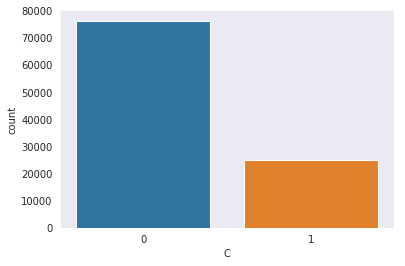

In [50]:
##  classs balancing
sns.countplot(x= df['C'])
plt.show()

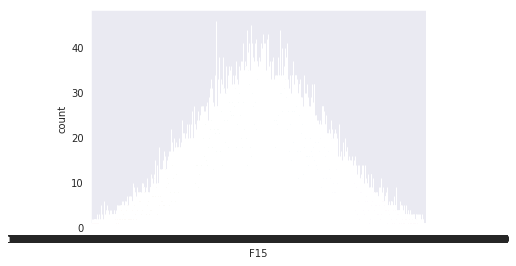

In [20]:
var_x = df['F15']
sns.set_style("dark") # darkgrid, whitegrid, dark, white, ticks

# Cut the window in 2 parts

#, y=None, hue=None, data=None, order=None, 
#             hue_order=None, ci=95, n_boot=1000, units=None, 
#             orient=None, color=None)

plt.show()

In [46]:
sum(var_x.isna())

0

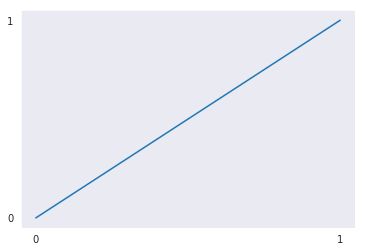

In [59]:
var_x, var_y = list(df['F14']), list(df['C'])

plt.plot(var_y, var_y)

plt.show()

----------------------------------------------------------------------------------------------------
UniVariate Plot
----------------------------------------------------------------------------------------------------


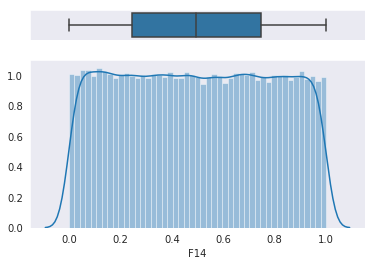

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
BiVariate Plot
----------------------------------------------------------------------------------------------------


TypeError: can't multiply sequence by non-int of type 'float'

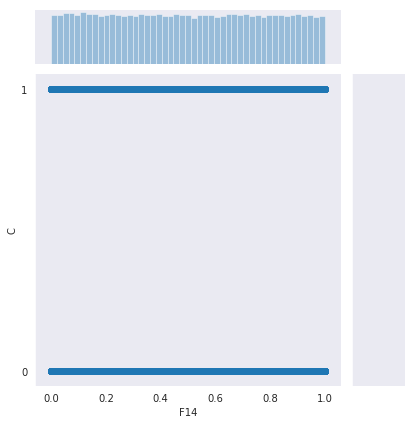

In [19]:
## univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("darkgrid") #whitegrid, darkgrid, dark
    
def visualizeFeature(var_x, var_y):
    '''
    plotting Univariate and bivariate  plots
    '''
    # plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    # ---------------------------------< Univariate Analysis >--------------------------------- #
    print('-'*100+ '\nUniVariate Plot\n'+'-'*100)
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    if (var_x.dtypes == 'int') | (var_x.dtypes == 'float'):
        # Cut the window in 2 parts
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        # Add a graph in each part
        sns.boxplot(var_x, ax=ax_box)
        sns.distplot(var_x, ax=ax_hist)
        # Remove x axis name for the boxplot
        ax_box.set(xlabel='')
        plt.show()
    elif var_x.dtypes == 'O':
        sns.countplot(x=var_x)
        plt.show()
    elif var_x.dtypes == 'datetime64[ns]':
        '''Nothing as of Now'''
        # sns.countplot(x=var_x) works but better alternative
        # plt.show() 
        print('')
    print('-'*100)
    
    # ---------------------------------< Bi-Variate Analysis >--------------------------------- #
    print('-'*100+ '\nBiVariate Plot\n'+'-'*100)
    if (((var_x.dtypes == 'int') | (var_x.dtypes == 'float')) & 
        ((var_y.dtypes == 'int') | (var_y.dtypes == 'float'))):
        sns.jointplot(x= var_x, y= var_y)
        plt.show()
    elif (((var_x.dtypes == 'int') | (var_x.dtypes == 'float')) &
          (var_y.dtypes == 'O')):
        sns.boxplot(x=var_y, y=var_x)
        plt.show()
    elif ((var_x.dtypes == 'O') & (var_y.dtypes == 'O')):
        sns.jointplot(x= var_x, y= var_y)
        plt.show()
    print('-'*100)
    #f.savefig(FileSavingLoc_dir + 'VariablePlot__{}__{}.png'.format(Var, time.time()), bbox_inches="tight")
    

visualizeFeature(df['F14'], df['C'])

In [ ]:
## generating correlation matrix
def generate_correlation_plot(DF, method='pearson'):
    '''
    Use to Generate Confusion Matrix and Storing the confusion matrix
    method : {‘pearson’, ‘kendall’, ‘spearman’} 
    '''
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(16, 14))
    plt.title('Pearson Correlation of Features')
    # Draw the heatmap using seaborn
    sns.heatmap(DF.corr(method=method),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", \
                linecolor='black', annot=True)
    plt.show()
#     f.savefig(config['input']['ClustFileSavingLoc_dir'] + 'CorrelationPlot__{}.png'.format(time.time()), bbox_inches="tight")

generate_correlation_plot(df)

In [ ]:
## splitting the dataset into  train and test 

## additionally balancing the classs

In [ ]:
## Applying Models

##